In [1]:
from types import *
from dataloader import *
from util import *
from graphs import *
from agreement import *
from scoring import *

# There's also 'tutorial' and 'preliminary' data
data = load_data('../annotated', batch_num=[5, 6], preprocess=True)

# NOTE: Unlike past data collection, the sentences have been randomized
# among annotators, meaning analysis which averages across sentences or calculates
# inter-annotator agreement may be wrong. Need to fix dataloading to re-sort sentences
# with the same annotators together.

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'kelly', 'rachel', 'ayush', 'vinayak', 'anton', 'vishnesh'}

anton - Batch 5, HIT 38 (ID 37) has 2 deletion edits but 1 annotations. Likely a missing annotation. Skipping edit type...
vinayak - Batch 6, HIT 16 (ID 45) has 1 insertion edits but -1 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 deletion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 5, HIT 21 (ID 65) has 4 insertion edits but 3 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batc

In [2]:
# Print spans with comments
get_comments(data)

ANTON - HIT 3: no change


AYUSH - HIT 105: Annotating this was kind of hard, not sure how to show concatenation with the current taxonomy

ANTON - HIT 108: 



In [3]:
# The systems we looked at
systems = set([x['system'] for x in data])

# Edit types
edit_types = set(data[0]['annotations'].keys())

In [4]:
# Example: Searches for coreference errors
deletions = [process_annotation(k) for k in [i for j in [[x for x in sent['edits'] if x['type'] == 'deletion'] for sent in data] for i in j]]
for d in deletions:
    if d['error_type'] == Error.COREFERENCE:
        print(d)

Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['good', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...
Couldn't process coreference error for deletion: ['perfect', '', 'no']. Assuming 'no'...


In [5]:
# Example: Some of the annotations for sentence 0
data[0]['processed_annotations'][:2]

[{'edit_type': 'deletion',
  'id': 0,
  'information_impact': <Information.LESS: 'Less Information'>,
  'type': <Quality.QUALITY: 'No Error'>,
  'family': <Family.CONTENT: 'Content'>,
  'grammar_error': False,
  'error_type': None,
  'rating': 3,
  'size': 0.008310249307479225,
  'score': 0.970747553725849},
 {'edit_type': 'deletion',
  'id': 1,
  'information_impact': <Information.LESS: 'Less Information'>,
  'type': <Quality.QUALITY: 'No Error'>,
  'family': <Family.CONTENT: 'Content'>,
  'grammar_error': False,
  'error_type': None,
  'rating': 2,
  'size': 0.030470914127423823,
  'score': 0.8085959365626684}]

In [6]:
# Example: Some of the edits for sentence 0
data[0]['edits'][:2]

[{'type': 'deletion',
  'id': 0,
  'original_span': [(92, 95)],
  'simplified_span': None,
  'annotation': ['perfect', 'no', 'no']},
 {'type': 'deletion',
  'id': 1,
  'original_span': [(113, 124)],
  'simplified_span': None,
  'annotation': ['good', 'no', 'no']}]

In [7]:
# Example: Agreement between annotators on edit types
# for edit_type in ['deletion', 'insertion', 'reorder', 'substitution']:
#     print(f'{edit_type} -> {calculate_agreement(data, edit_type, drop_no_spans=True)}')

In [8]:
# TODO: trivial edits on substitutions aren't being processed correctly
# for sent in data:
#     for ann in sent['processed_annotations']:
#         if ann['type'] == Quality.TRIVIAL and ann['rating'] == None:
#             print(sent['id'])
#             print([e for e in sent['edits'] if e['type'] == 'substitution'])
#             print(ann)
#             print(sent['system'])
#             print(sent['system'])
#             print(sent['user'])

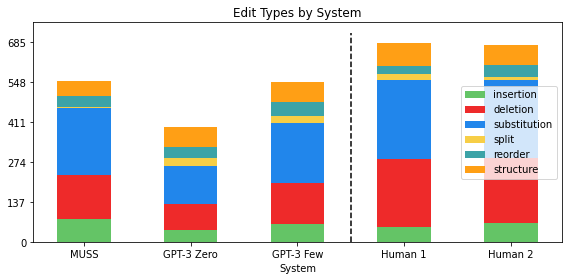

In [9]:
edit_type_by_system(data, flipped=True)

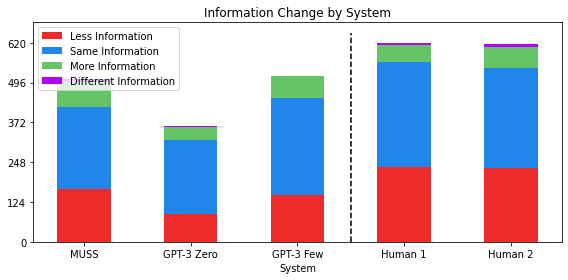

In [10]:
system_by_information_change(data)

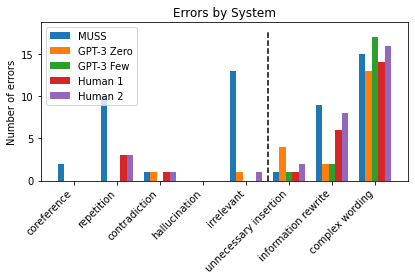

In [11]:
errors_by_system(data)

In [12]:
sankey_seperated(data)

In [13]:
sankey_combined(data)

In [14]:
# Prints the sentences where annotators identified insertion errors
for error in [Error.REPETITION, Error.CONTRADICTION, Error.HALLUCINATION, Error.IRRELEVANT]:
    print(f'\n{error.value}')
    for sent in data:
        for ann in sent['processed_annotations']:
            if ann['error_type'] == error:
                print(f'{get_sent_info(sent)} \t {system_name_mapping[sent["system"]]}')


Repetition
rachel - Batch 5, HIT 6 (ID 9) 	 Human 1
vinayak - Batch 6, HIT 22 (ID 21) 	 Human 2
vinayak - Batch 6, HIT 17 (ID 46) 	 Human 2
vinayak - Batch 6, HIT 8 (ID 69) 	 MUSS
rachel - Batch 5, HIT 18 (ID 76) 	 MUSS
vishnesh - Batch 5, HIT 39 (ID 76) 	 MUSS
vinayak - Batch 6, HIT 33 (ID 77) 	 Human 1
rachel - Batch 5, HIT 34 (ID 87) 	 MUSS
rachel - Batch 5, HIT 38 (ID 91) 	 MUSS
ayush - Batch 6, HIT 17 (ID 105) 	 Human 2
anton - Batch 6, HIT 29 (ID 127) 	 MUSS
ayush - Batch 6, HIT 28 (ID 127) 	 MUSS
ayush - Batch 6, HIT 29 (ID 128) 	 Human 1
ayush - Batch 6, HIT 4 (ID 137) 	 MUSS
kelly - Batch 6, HIT 9 (ID 137) 	 MUSS
vishnesh - Batch 6, HIT 19 (ID 137) 	 MUSS

Contradiction
vinayak - Batch 6, HIT 4 (ID 4) 	 MUSS
rachel - Batch 5, HIT 8 (ID 5) 	 GPT-3 Zero
rachel - Batch 5, HIT 26 (ID 79) 	 Human 1
ayush - Batch 6, HIT 7 (ID 95) 	 Human 2

Hallucination

Irrelevant
anton - Batch 5, HIT 5 (ID 4) 	 MUSS
anton - Batch 5, HIT 13 (ID 12) 	 MUSS
kelly - Batch 5, HIT 13 (ID 12) 	 MUSS
ke

In [15]:
# Print the avg. sentence scores for each system
for s in systems:
    print(f'{system_name_mapping[s]} \t {avg([sent["score"] for sent in data if sent["system"] == s])}')

GPT-3 Zero 	 5.58
Human 2 	 10.38
GPT-3 Few 	 9.32
Human 1 	 8.9
MUSS 	 1.32


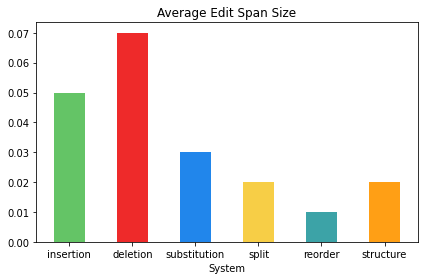

In [16]:
annotations = [x for y in [sent['processed_annotations'] for sent in data] for x in y]
avg_span_size(annotations)

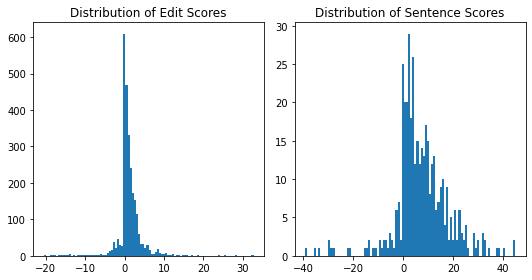

In [17]:
# Show the distribution of edit and sentence scores
score_distribution(data)

In [40]:
# Get the best and worst performing sentences
best, worst = best_performing(data)

Highest Scoring:
vishnesh - Batch 6, HIT 32 (ID 31) - 44.74048122070516
vinayak - Batch 6, HIT 16 (ID 85) - 44.49183097534004
vishnesh - Batch 6, HIT 31 (ID 33) - 34.13348449384171
vishnesh - Batch 6, HIT 13 (ID 116) - 32.09230173784458
vinayak - Batch 6, HIT 12 (ID 81) - 29.57865338519448

Lowest scoring:
kelly - Batch 6, HIT 16 (ID 15) - -33.45748290617187
anton - Batch 6, HIT 16 (ID 15) - -29.987185692076245
anton - Batch 6, HIT 29 (ID 28) - -29.35827700666531
ayush - Batch 6, HIT 28 (ID 28) - -28.783217257343548
vinayak - Batch 6, HIT 4 (ID 73) - -27.56380903186681


In [18]:
# Get setences with a score of 0
zeros = zero_scoring_sents(data)

anton - Batch 5, HIT 19 (ID 18)
ayush - Batch 5, HIT 14 (ID 18)
vinayak - Batch 6, HIT 10 (ID 72)


In [42]:
# edit_length(data, systems, simpeval=True)

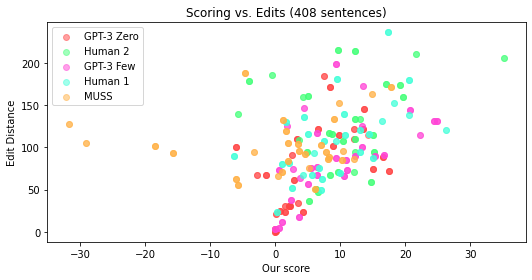

In [19]:
# Averages our scores before plotting
import copy
new_data = copy.deepcopy(data)

for id_ in set([sent['id'] for sent in data]):
    sents = [sent for sent in data if sent['id'] == id_]
    new_score = avg([sent['score'] for sent in sents])
    for i in range(len(new_data)):
        if new_data[i]['id'] == id_:
            new_data[i]['score'] = new_score
            
edit_length(new_data, systems, simpeval=False)

In [20]:
# Get sentences with at least 1 structure change from 1 annotator
ids = set()
for sent in data:
    if 'structure' in [x['type'] for x in sent['edits']]:
        ids.add(sent['id'])
ids = sorted(list(ids))
print(f'Sentences with at least 1 structure change: {len(ids)} / {len(data)}')

Sentences with at least 1 structure change: 111 / 408


anton - Batch 5, HIT 6 (ID 5)

In Marriages and Infidelities, Oates explicitly alludes to novellas and short stories by earlier writers, making use of either their titles or their themes and adapting them in accordance with her artistic intentions.
In "Marriages and Infidelities," Oates uses the titles and themes from earlier novellas and short stories and adapts them to match her own goals.

rachel - Batch 5, HIT 8 (ID 5)

In Marriages and Infidelities, Oates explicitly alludes to novellas and short stories by earlier writers, making use of either their titles or their themes and adapting them in accordance with her artistic intentions.
In "Marriages and Infidelities," Oates uses the titles and themes from earlier novellas and short stories and adapts them to match her own goals.



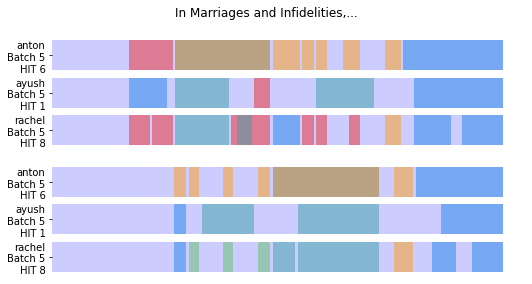

In [22]:
# Display a sentence with a structure change
id_ = 4
sents = [sent for sent in data if sent['id'] == ids[id_]]
print_changes(sents)
draw_agreement(sents)